## Homework 2 Part 2 Task 1: PCA
We will use the Fashion-MNIST dataset to build a PCA model (i.e. eigenvectors and eigenvalues). <br>
https://github.com/zalandoresearch/fashion-mnist <br>
Then, we will use the PCA model to <br>
(1) visualize the data in 2D <br>
(2) generate new images as a generative model <br>
This is a guided-task: <br>
You will see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn

#### First, we load the dataset

In [1]:
# load the data
from sklearn.datasets import fetch_openml
fasion_mnist=fetch_openml(name="Fashion-MNIST")

In [6]:
fasion_mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0    33.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [2]:
data=fasion_mnist.data
images=data.values.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')

In [3]:
#a row in data is an image (28x28 reshaped into a vector of 784 elements)
data.shape

(70000, 784)

In [4]:
# images[0] is the first image (28x28)
images.shape

(70000, 28, 28)

In [5]:
#an element in target is the class label of the corresponding image in data
target.shape

(70000,)

In [6]:
fullData = data.copy()
fullData['label'] = target

In [12]:
[target.min(), target.max()]

[0, 9]

TypeError: '(0, slice(None, None, None))' is an invalid key

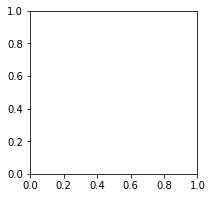

In [13]:
# show some of the images
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, target.shape[0], 1000):
    x=data[n,:]
    x=x.reshape(28,28) # reshape a vector to an image
    ax.imshow(x, cmap='gray')    
    ax.axis('off')
    ax.set_title(target[n])
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)  

#### we need the function plot_components for visualization

In [14]:
from matplotlib import offsetbox
import numpy as np
def plot_components(data, model, images, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

### Your work begins here

In [15]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#it runs faster to get the eigenvectors and eigenvalues
#it is more memory efficient
#the function 'fit' computes eigenvectors and eigenvalues
#use 'fit_transform' to do fit and forward transform together

from sklearn.decomposition import IncrementalPCA
from scipy import sparse
pca = IncrementalPCA(n_components=2, batch_size=200)  # transform/project data from 784 to 2 dimensions
X = sparse.csr_matrix(data)
Beta = pca.fit_transform(X)
Y = Beta / np.sqrt(pca.explained_variance_)
print(X.shape)
print(Y.shape)

(70000, 784)
(70000, 2)


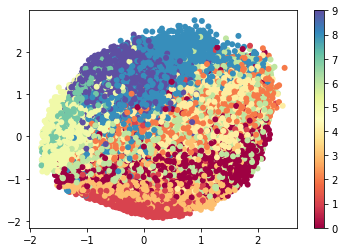

In [16]:
#show the data points in 2D
#you can find example code in my lecture notes (notebook files)
#you need to create a figure and axis:  fig, ax = plt.suplots()

plt.scatter(Y[:, 0], Y[:, 1], c=fasion_mnist.target.astype('int64'),  edgecolor='none',  cmap='Spectral')
plt.colorbar()

In [32]:
data0.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,142.0,200.0,...,120.0,110.0,158.0,18.0,0.0,3.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,91.0,80.0,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [79]:
#show only the data points/images with class label=0 (i.e. target is 0) in 2D
fullData0 = fullData[fullData['label'] == 0]
data0 = fullData0.drop('label', axis = 1)
X0 = sparse.csr_matrix(data0)
Beta0 = pca.fit_transform(X0)
Y0 = Beta0 / np.sqrt(pca.explained_variance_)
plt.scatter(Y0[:n, 0], Y0[:n, 1])
plt.show()



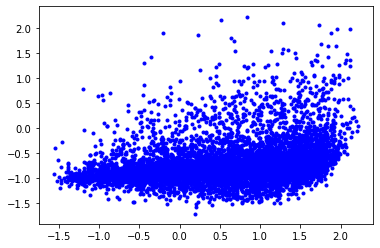

In [ ]:
#show only the data points/images with class label=0 (i.e. target is 0) in 2D



In [21]:
from matplotlib import offsetbox
import numpy as np
def plot_components(data, model, images, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

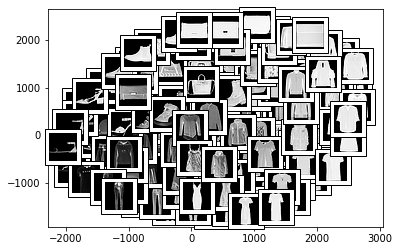

In [58]:
%matplotlib inline
thumb_frac=0.05
cmap='gray'
images=data.values.reshape(-1,28,28)
ax =  plt.gca()
proj = pca.fit_transform(data)
ax.plot(proj[:, 0], proj[:, 1], '.k')
# plt.show()
if images is not None:
    min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
    shown_images = np.array([2 * proj.max(0)])
    for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

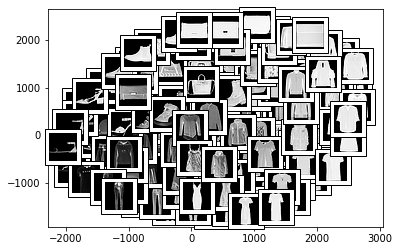

In [59]:
# use plot_components to show the data points
# the parameter 'model' of plot_components refers to the pca model
images=data.values.reshape(-1,28,28)
plot_components(data, pca, images, ax=plt.gca(),
                    thumb_frac=0.05, cmap='gray')

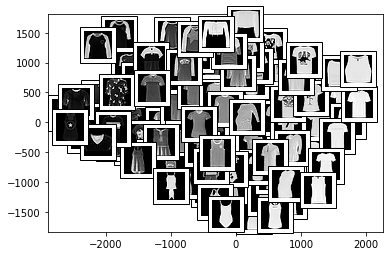

In [60]:
# use plot_components to show the data points
# the parameter 'model' of plot_components refers to the pca model
images0=data0.values.reshape(-1,28,28)
plot_components(data0, pca, images0, ax=plt.gca(),
                    thumb_frac=0.05, cmap='gray')

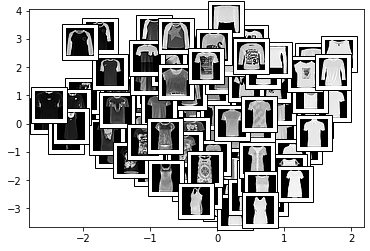

In [ ]:
# use plot_components to show the data points with class label=0
# you may need something like this: data[target==0], images[target==0]
images0=data0.values.reshape(-1,28,28)
plot_components(data0, pca, images0, ax=plt.gca(),
                    thumb_frac=0.05, cmap='gray')

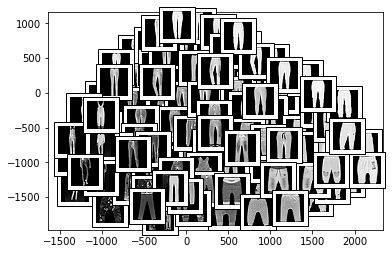

In [61]:
# use plot_components to show the data points with class label=1
# you may need something like this: data[target==1], images[target==1]
fullData1 = fullData[fullData['label'] == 1]
data1 = fullData1.drop('label', axis = 1)
images1=data1.values.reshape(-1,28,28)
plot_components(data1, pca, images1, ax=plt.gca(),
                    thumb_frac=0.05, cmap='gray')

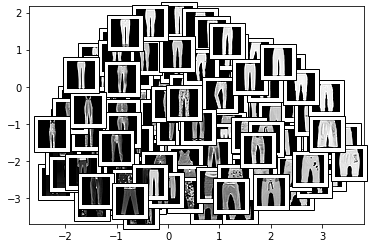

In [ ]:
# use plot_components to show the data points with class label=1
# you may need something like this: data[target==1], images[target==1]

From the above examples, we can see that PCA can extract meaningful features from the images 

### 2. Use PCA to generate new images 

First, we need to figure out how many components we need

In [8]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#set n_components to a large number, e.g, 100
pca100 = IncrementalPCA(n_components=100, batch_size=200)  # transform/project data from 784 to 100 dimensions
#X = sparse.csr_matrix(data)
Beta100 = pca100.fit_transform(X)
Y100 = Beta100 / np.sqrt(pca100.explained_variance_)

NameError: name 'IncrementalPCA' is not defined

In [7]:
#plot the curve of 'percentage of variance explained' (0~1) vs n_components (0~100)
#apply np.cumsum on explained_variance_ratio_
# use plt.grid() to show grid
pca100 = pca100.fit(X)
plt.plot(np.cumsum(pca100.explained_variance_ratio_))
plt.xlabel('number of components', fontsize=16)
plt.ylabel('cumulative explained variance ratio', fontsize=16)

NameError: name 'pca100' is not defined

In [ ]:
# choose n_component such that 
# (1) average reconstruction error < 20%
# (2) percentage of variance explained > 80%
# (1) and (2) are the same


In [ ]:
# get the mean, eigenvalues, and eigenvectors from the above pca model
# assume the name of mean is mu
# the name of eigenvalues is v (a 1D array)
# the name of eigenvectors is w (a 2D array)


In [ ]:
v.shape

In [ ]:
w.shape

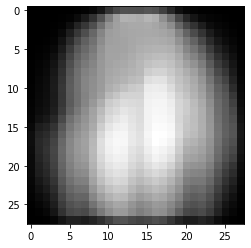

In [ ]:
# plot the mean image from pca
# you need to reshape it to 28x28
plt.imshow(mu.reshape(28,28), cmap='gray')

In [ ]:
# use a for loop to show the images of eigenvectors
# image is w[n].reshape(28,28)
# sample code:
# fig, ax = plt.subplots(figsize=(3, 3))
# for n in range(0, 100):
#     ax.imshow(w[n].reshape(28,28), cmap='gray')    
#     ax.axis('off')
#     ax.set_title(n)
#     plt.draw()
#     display.clear_output(wait=True)
#     display.display(fig)
#     plt.pause(0.2) 


In [ ]:
# L2 norm of an eigenvector w[0]
np.sum(w[0]**2)

In [ ]:
# generate a random number
3*np.random.randn()

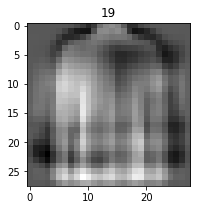

<Figure size 432x288 with 0 Axes>

In [ ]:
# generate and show the new images
# use a for loop to geneate 100 new images
# inside the for loop
#     x_new = mu + y[0]*sqrt(v[0])*w[0]+...+y[K]*sqrt(v[K])*w[K]
#     use a for loop to get X_new using the above equation
#     K is the number of components
#     y[k] is a random number generated using 3*np.random.randn()


PCA is not good at generating images. <br>
There is a better method based on neural networks.

### t-SNE for visualization

In [ ]:
#select a subset of data points for TSNE
#because TSNE is very time-consuming
data_s=data[0::100]
target_s=target[0::100]
images_s=images[0::100]

In [ ]:
# run t-SNE on data_s and visualize the data in 2D
